In [1]:
# Read CSV and convert to Pandas DataFrame

from pathlib import Path
import pandas as pd

ROOT_PATH = Path('.') 
DATA_FILE_PATH = ROOT_PATH.joinpath('videogamesales').joinpath('vgsales.csv')  #videogamesales vgsales.csv netflix-shows netflix_titles.csv
DB_NAME = ROOT_PATH.joinpath('videogame_sales.db')
TABLE_NAME = 'game_sales'


# Read CSV
csv_data = pd.read_csv(DATA_FILE_PATH)

# Convert to DataFrame
df = pd.DataFrame(csv_data)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# Create a DB file and load the data from the DataFrame into the DB.

import sqlite3
from _sqlite3 import Error


def sql_connection(db_name):
    try:
        db = sqlite3.connect(db_name)
        print("Connection to database has been established")
        return db
    except Error:
        print(Error)

def insert_data(db, data_df):
    data_df.columns = data_df.columns
    data_df.to_sql(TABLE_NAME, con=db, if_exists='replace', index_label='id')

db = sql_connection(DB_NAME)
    
insert_data(db, df)
db.close()

Connection to database has been established


Connection to database has been established
This query will print the top-10 games for a chosen year
DB contains data from 1980 to 2020.
Enter a year: 1981
Connection to database has been established


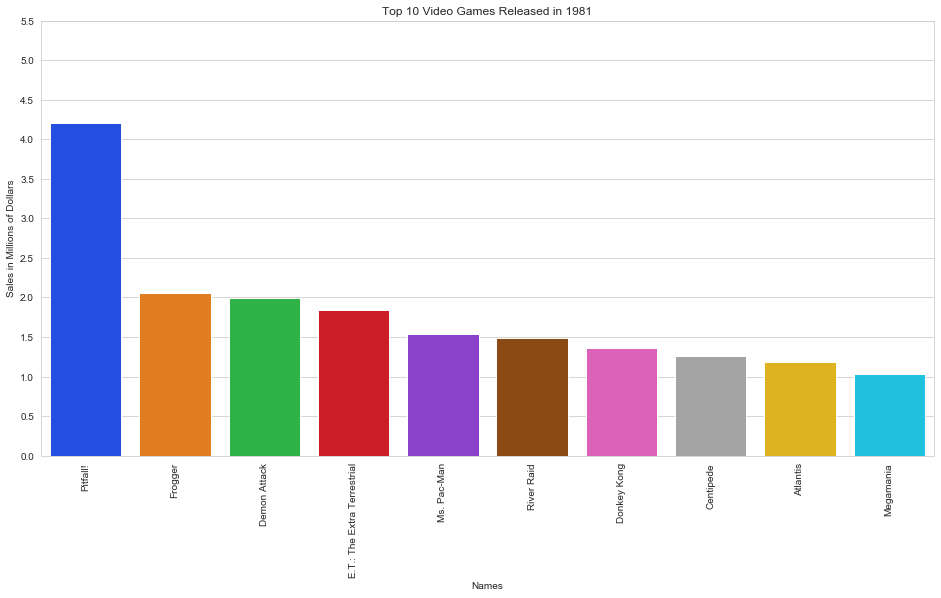

                          Name  N.Am_Sales
0                     Pitfall!        4.21
1                      Frogger        2.06
2                 Demon Attack        1.99
3  E.T.: The Extra Terrestrial        1.84
4                  Ms. Pac-Man        1.54
5                   River Raid        1.49
6                  Donkey Kong        1.36
7                    Centipede        1.26
8                     Atlantis        1.18
9                    Megamania        1.03


In [11]:
# This query will print the top-10 games for a chosen year and then show a bargraph
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import operator


TABLE_NAME = 'game_sales'


def year_query(cur, date_string):
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Name", "NA_Sales" FROM {TABLE_NAME} WHERE Year LIKE "%{date_string}%" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data to build user input request
db = sql_connection(DB_NAME)
cur = db.cursor()
cur.execute(f'SELECT min(Year) FROM {TABLE_NAME}')
min_year = int(cur.fetchone()[0])
cur.execute(f'SELECT max(Year) FROM {TABLE_NAME}')
max_year = int(cur.fetchone()[0])
db.close()

# Get user input
print("This query will print the top-10 games for a chosen year")
print("DB contains data from " + str(min_year) + " to " + str(max_year) + ".")
repeat = 1
while repeat == 1:
    selected_year = input("Enter a year: ")
    if int(selected_year) < min_year or int(selected_year) > max_year:
        print("Invalid year!")
    else:
        repeat = 0

# Get data from the DB        
year_db_response = year_query(cur, selected_year)

# Sort data and convert it to a Pandas DataFrame for printing later
year_db_response.sort(key = operator.itemgetter(1), reverse = True)
year_query = pd.DataFrame(year_db_response)
year_query.columns = ["Name", "N.Am_Sales"]
year_query["N.Am_Sales"] = year_query["N.Am_Sales"]


# Build Seabourn plot
names = []
sales = []

for i in range(10):
    names.append(year_db_response[i][0])
    sales.append(year_db_response[i][1])

plt.figure(figsize=(16, 8))
title = f'Top 10 Video Games Released in {selected_year}'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=names, 
    y=sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Names', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(sales) + 0.5)
min_sales = 0
max_sales = int( max(sales) + 2 )
yticks =  [i/2 for i in range(max_sales*2)]
axes.set_yticks(yticks)


plt.show()
# Print Pandas df
print(year_query.head(10))

Connection to database has been established


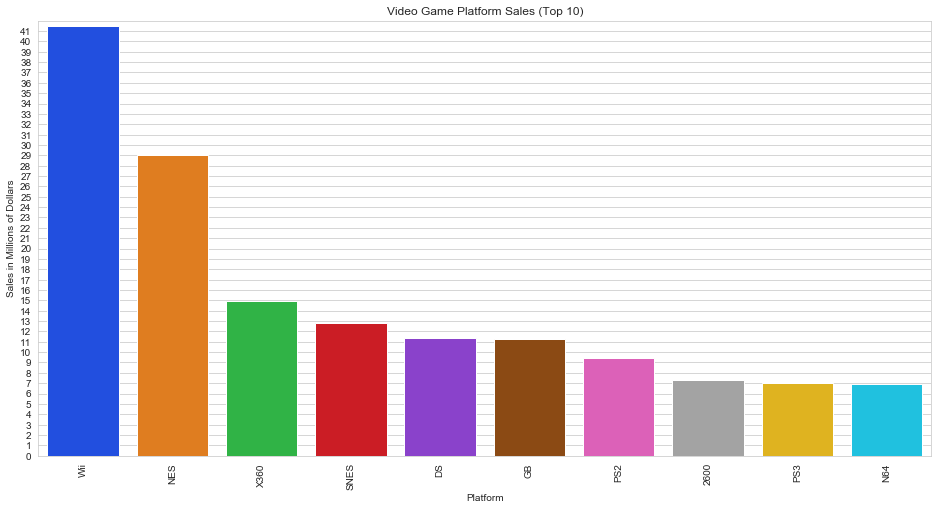

  Platform  N.Am_Sales
0      Wii       41.49
1      NES       29.08
2     X360       14.97
3     SNES       12.78
4       DS       11.38
5       GB       11.27
6      PS2        9.43
7     2600        7.28
8      PS3        7.01
9      N64        6.91


In [12]:
# This query will print the gross sales by genre

TABLE_NAME = 'game_sales'


def platform_query():
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Platform", "NA_Sales" FROM {TABLE_NAME} GROUP BY "Platform" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data from the DB        
platform_db_response = platform_query()

# Convert it to a Pandas DataFrame for printing later
platform_db_response.sort(key = operator.itemgetter(1), reverse = True)
platform_query = pd.DataFrame(platform_db_response)
platform_query.columns = ["Platform", "N.Am_Sales"]



# Build Seabourn plot
platform = []
platform_sales = []

for i in range(10):
    platform.append(platform_db_response[i][0])
    platform_sales.append(platform_db_response[i][1])
    
plt.figure(figsize=(16, 8))
title = f'Video Game Platform Sales (Top 10)'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=platform, 
    y=platform_sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Platform', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(platform_sales) + 0.5)
min_sales = 0
max_sales = int( max(platform_sales) + 1 )
yticks =  [i for i in range(max_sales)]
axes.set_yticks(yticks)

plt.show()
# Print Pandas df
print(platform_query.head(10))

Connection to database has been established
       Platform  N.Am_Sales
0        Sports       41.49
1      Platform       29.08
2       Shooter       26.93
3        Puzzle       23.20
4        Racing       15.85
5          Misc       14.03
6  Role-Playing       11.27
7    Simulation        9.07
8        Action        7.01
9      Fighting        6.75


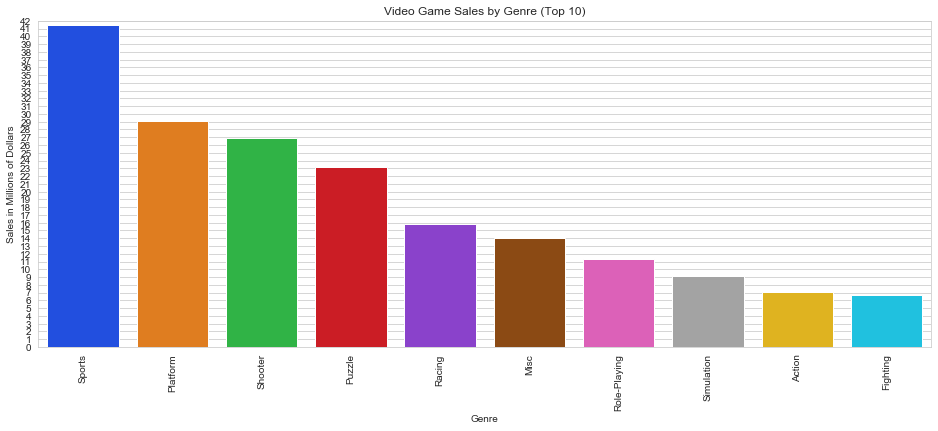

In [8]:
# This query will print the gross sales by genre

TABLE_NAME = 'game_sales'


def genre_query():
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Genre", "NA_Sales" FROM {TABLE_NAME} GROUP BY "Genre" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data from the DB        
genre_db_response = genre_query()

# Convert it to a Pandas DataFrame for printing later
genre_db_response.sort(key = operator.itemgetter(1), reverse = True)
genre_query = pd.DataFrame(genre_db_response)
genre_query.columns = ["Platform", "N.Am_Sales"]



# Build Seabourn plot
genre = []
genre_sales = []

for i in range(10):
    genre.append(genre_db_response[i][0])
    genre_sales.append(genre_db_response[i][1])

plt.figure(figsize=(16, 8))
title = f'Video Game Sales by Genre (Top 10)'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=genre, 
    y=genre_sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Genre', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(genre_sales) + 0.5)
min_sales = 0
max_sales = int( max(genre_sales) + 2 )
yticks =  [i for i in range(max_sales)]
axes.set_yticks(yticks)

# Print Pandas df
print(genre_query.head(10))

Connection to database has been established
      Year  N.Am_Sales
0      NaN        4.26
1   1980.0        4.00
2   1981.0        4.21
3   1982.0        7.28
4   1983.0        0.73
5   1984.0       26.93
6   1985.0       29.08
7   1986.0        3.74
8   1987.0        2.19
9   1988.0        9.54
10  1989.0       23.20
11  1990.0       12.78
12  1991.0        2.42
13  1992.0        6.16
14  1993.0        5.99
15  1994.0        4.36
16  1995.0        2.10
17  1996.0       11.27
18  1997.0        4.02
19  1998.0        5.89
20  1999.0        9.00
21  2000.0        2.55
22  2001.0        6.85
23  2002.0        8.41
24  2003.0        3.27
25  2004.0        9.43
26  2005.0        9.07
27  2006.0       41.49
28  2007.0        8.94
29  2008.0       15.85
30  2009.0       15.75
31  2010.0       14.97
32  2011.0        9.03
33  2012.0        4.99
34  2013.0        7.01
35  2014.0        3.80
36  2015.0        5.77


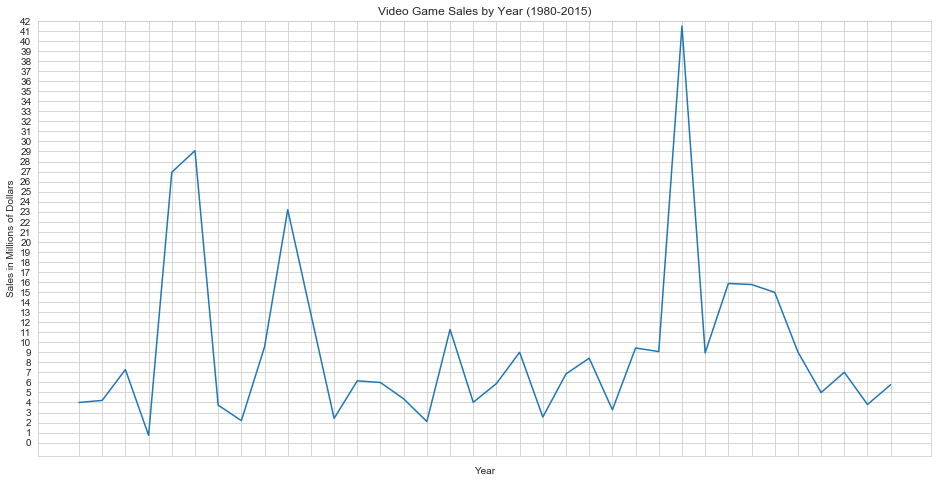

In [10]:
# This query will print the gross sales by year

import numpy as np

TABLE_NAME = 'game_sales'


def annual_query():
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Year", "NA_Sales" FROM {TABLE_NAME} GROUP BY "Year" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data from the DB        
annual_db_response = annual_query()

# Convert it to a Pandas DataFrame for printing later
#annual_db_response.sort(key = operator.itemgetter(1), reverse = False)
annual_query = pd.DataFrame(annual_db_response)
annual_query.columns = ["Year", "N.Am_Sales"]

# Build Seabourn plot
year = []
annual_sales = []

for i in range(37):
    year.append(annual_db_response[i][0])
    annual_sales.append(annual_db_response[i][1])

plt.figure(figsize=(16, 8))
title = f'Video Game Sales by Year (1980-2015)'
sns.set_style('whitegrid')

axes = sns.lineplot(
    x=year, 
    y=annual_sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Year', ylabel='Sales in Millions of Dollars')

axes.set_ylim(top=max(annual_sales) + 0.5)
min_sales = 0
max_sales = int( max(annual_sales) + 2 )
yticks =  [i for i in range(max_sales)]
xticks =  [j for j in range(1980, 2016)]
axes.set_yticks(yticks)
axes.set_xticks(xticks)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Print Pandas df
print(annual_query.head(37))